In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


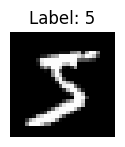

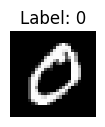

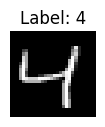

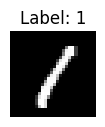

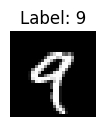

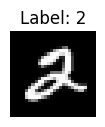

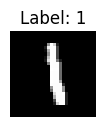

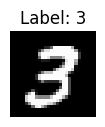

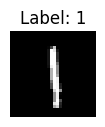

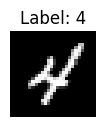

In [3]:
# Step 2: Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Step 3: Visualize a few samples
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

In [4]:
# Step 4: Preprocess the Data
# Normalize pixel values to 0–1 range
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten 28x28 images to 784 features
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))
# One-hot encode labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
# Step 5: Build the ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Step 6: Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Train the Model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)
# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test_cat,
verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8158 - loss: 0.6384 - val_accuracy: 0.9590 - val_loss: 0.1480
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9541 - loss: 0.1602 - val_accuracy: 0.9698 - val_loss: 0.1047
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9691 - loss: 0.1048 - val_accuracy: 0.9690 - val_loss: 0.1030
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9753 - loss: 0.0828 - val_accuracy: 0.9752 - val_loss: 0.0895
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0618 - val_accuracy: 0.9755 - val_loss: 0.0888
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9859 - loss: 0.0509 - val_accuracy: 0.9783 - val_loss: 0.0828
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9788 - val_loss: 0.0826
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0

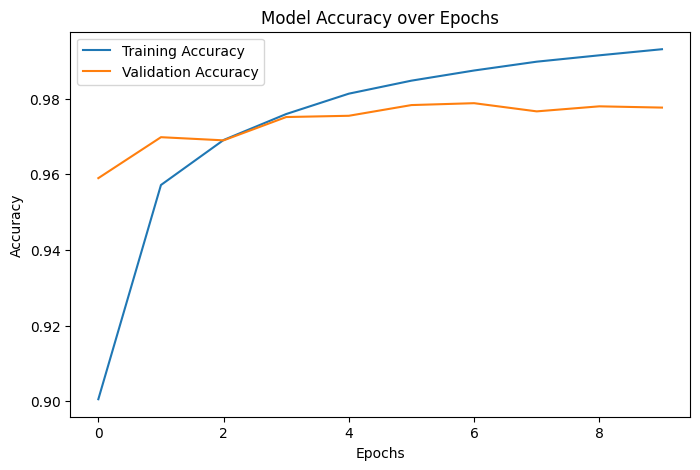

In [9]:
# Step 9: Plot Training Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


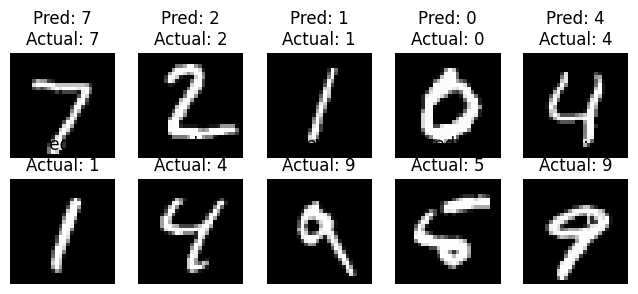

In [11]:
# Step 10: Display Sample Predictions
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nActual: {y_test[i]}")
    plt.axis('off')
plt.show()